In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the data
df = pd.read_csv("C:\\Users\\DaveN\\OneDrive\\Documents\\DI_BOOTCAMP_STAGE\\Week 17\\Day 5\\Daily Challenge  Titanic\\titanic.csv")


In [16]:
# Explore the Data
print("Statistical Summary:")
print(df.describe())

print("\nPreview of the Data:")
print(df.head())

print("\nMetadata of the DataFrame:")
print(df.info())


Statistical Summary:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Preview of the Data:
   PassengerId  Survived  Pclass  \
0 

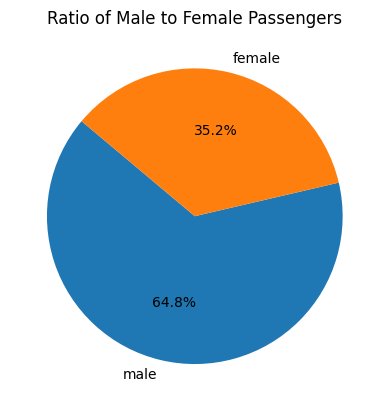

In [17]:
# Visualize the Data
# Pie Chart: Ratio of Male to Female Passengers
gender_counts = df['Sex'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of Male to Female Passengers')
plt.show()

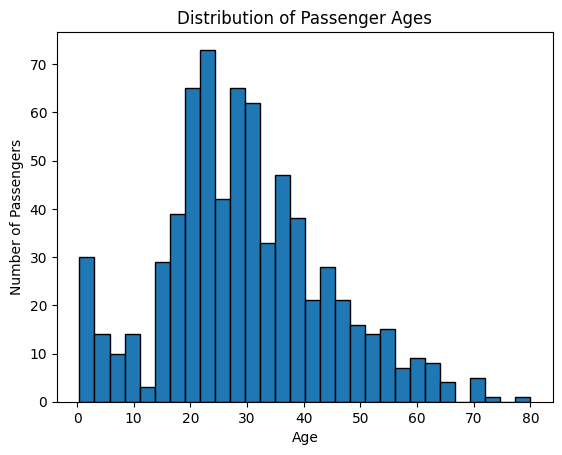

In [18]:
# Histogram: Distribution of Passenger Ages
plt.hist(df['Age'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Distribution of Passenger Ages')
plt.show()

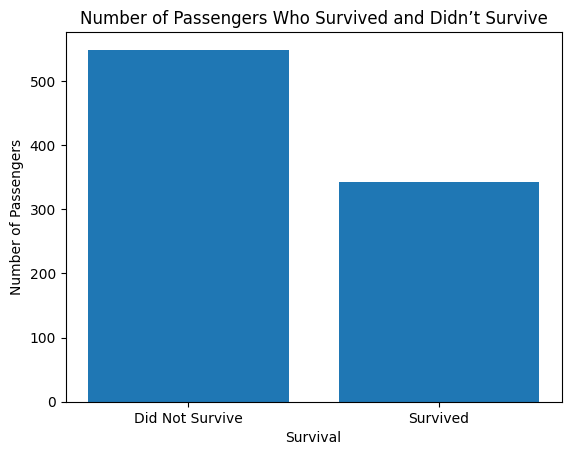

In [19]:
# Bar Plot: Number of Passengers Who Survived and Didn’t Survive
survival_counts = df['Survived'].value_counts()
plt.bar(survival_counts.index, survival_counts, tick_label=['Did Not Survive', 'Survived'])
plt.xlabel('Survival')
plt.ylabel('Number of Passengers')
plt.title('Number of Passengers Who Survived and Didn’t Survive')
plt.show()


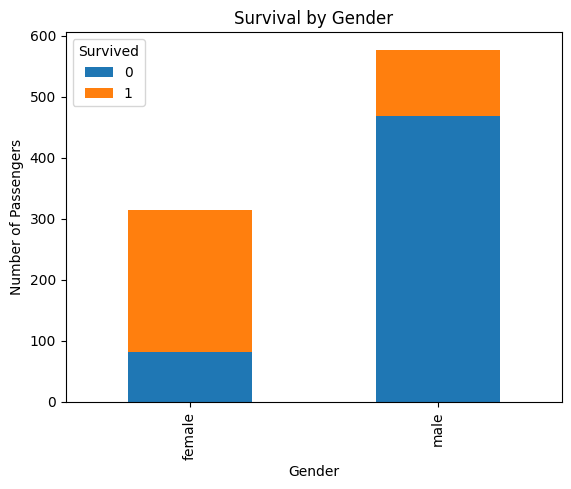

In [20]:
# Stacked Bar Plot: Number of Passengers Who Survived and Didn’t Survive, Split by Gender
survival_gender = df.groupby(['Sex', 'Survived']).size().unstack()
survival_gender.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Number of Passengers')
plt.title('Survival by Gender')
plt.show()

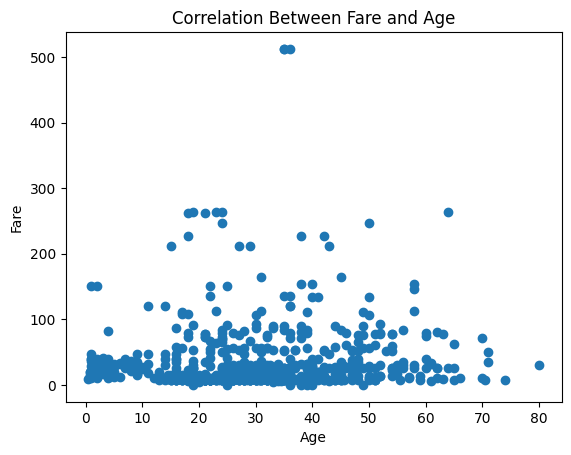

In [21]:
# Scatter Plot: Correlation Between Fare and Age
plt.scatter(df['Age'], df['Fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Correlation Between Fare and Age')
plt.show()

In [24]:
# Preprocess the Data
# Handle Missing Values in the ‘Age’ Column
df['Age'] = df['Age'].fillna(df['Age'].mean())


In [25]:
# Normalize the ‘Fare’ Column
scaler = MinMaxScaler()
df['Fare'] = scaler.fit_transform(df[['Fare']])

In [26]:
# Convert the ‘Sex’ Column into Numerical Representation Using One-Hot Encoding
df = pd.get_dummies(df, columns=['Sex'], drop_first=True)

In [27]:
# Data Analysis
# Calculate the Survival Rate for Different Genders
survival_rate_gender = df.groupby('Sex_male')['Survived'].mean()
print("Survival Rate by Gender:")
print(survival_rate_gender)

Survival Rate by Gender:
Sex_male
False    0.742038
True     0.188908
Name: Survived, dtype: float64


In [28]:
# Calculate the Survival Rate for Different Passenger Classes
survival_rate_class = df.groupby('Pclass')['Survived'].mean()
print("Survival Rate by Passenger Class:")
print(survival_rate_class)


Survival Rate by Passenger Class:
Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


In [29]:
# Identify the Passenger with the Highest Fare
highest_fare = df.loc[df['Fare'].idxmax()]
print("Passenger with the Highest Fare:")
print(highest_fare)

Passenger with the Highest Fare:
PassengerId                 259
Survived                      1
Pclass                        1
Name           Ward, Miss. Anna
Age                        35.0
SibSp                         0
Parch                         0
Ticket                 PC 17755
Fare                        1.0
Cabin                       NaN
Embarked                      C
Sex_male                  False
Name: 258, dtype: object
